In [1]:
#Importing our python's data manipulation libraries
import pandas as pd
import numpy as np

In [2]:
#Reading our data set
data = pd.read_csv("cars.csv")

I - Data Cleaning

In [3]:
data.sample(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
25523,Hyundai,i20,mechanical,red,155000,2009,gasoline,False,gasoline,1.2,...,True,False,False,False,False,False,False,False,False,68
10565,Ford,Focus,mechanical,silver,220000,2005,gasoline,False,gasoline,2.0,...,True,True,False,False,False,False,False,False,False,215
18281,Volkswagen,Touran,mechanical,blue,217000,2003,diesel,False,diesel,1.9,...,True,False,False,False,True,False,False,True,True,48
7598,Citroen,Xantia,mechanical,silver,400000,1998,gasoline,False,gasoline,1.8,...,False,True,False,False,True,False,False,False,False,264
10870,Ford,Transit,mechanical,white,347000,2004,diesel,False,diesel,2.0,...,True,False,False,False,True,False,False,True,False,43
28381,BMW,X5,automatic,black,91200,2013,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,58
6419,Citroen,Evasion,mechanical,blue,360,1996,diesel,False,diesel,1.9,...,False,False,False,False,False,False,False,False,False,6
27214,Nissan,Qashqai,automatic,silver,178000,2011,gasoline,False,gasoline,2.0,...,True,False,True,False,True,True,True,False,True,160
21001,Audi,A8,automatic,black,390000,2003,gas,True,gasoline,4.2,...,True,True,True,True,True,True,True,True,True,23
5244,Mitsubishi,Galant,mechanical,green,372700,1997,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,False,14


In [4]:
data.shape

(38531, 30)

In [5]:
#check na value
data.isna().values.any()

True

In [6]:
#Deleting na values
data = data.dropna()
data.isna().values.any()
data.shape

(38521, 30)

In [7]:
#Deleting some invalid columns
data = data.iloc[:,0:19]
data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7


In [8]:
#Show some limited values
print("Transmission: ", data.transmission.unique())
print("Engine Fuel: ", data.engine_fuel.unique())
print("Body Type: ", data.body_type.unique())
print("State: ", data.state.unique())
print("Driven Train: ", data.drivetrain.unique())

Transmission:  ['automatic' 'mechanical']
Engine Fuel:  ['gasoline' 'gas' 'diesel' 'hybrid-petrol' 'hybrid-diesel']
Body Type:  ['universal' 'suv' 'sedan' 'hatchback' 'liftback' 'minivan' 'minibus'
 'van' 'pickup' 'coupe' 'cabriolet' 'limousine']
State:  ['owned' 'emergency' 'new']
Driven Train:  ['all' 'front' 'rear']


In [10]:
# let's encode text or categorical data using one hot encoding
# let's create  dummy variables for columns that have limited values
dummy = pd.get_dummies(data[["engine_fuel", "body_type", "transmission","state","drivetrain"]], drop_first = True)
dummy.head()

,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol,body_type_coupe,body_type_hatchback,body_type_liftback,body_type_limousine,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,transmission_mechanical,state_new,state_owned,drivetrain_front,drivetrain_rear
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [11]:
# Concat dummy vars to the data
data = pd.concat( [data, dummy], axis = 1)
# now we don't need that original text data columns so let's drop it
data.drop(columns = ["engine_fuel", "body_type", "transmission","state","drivetrain"], inplace = True)

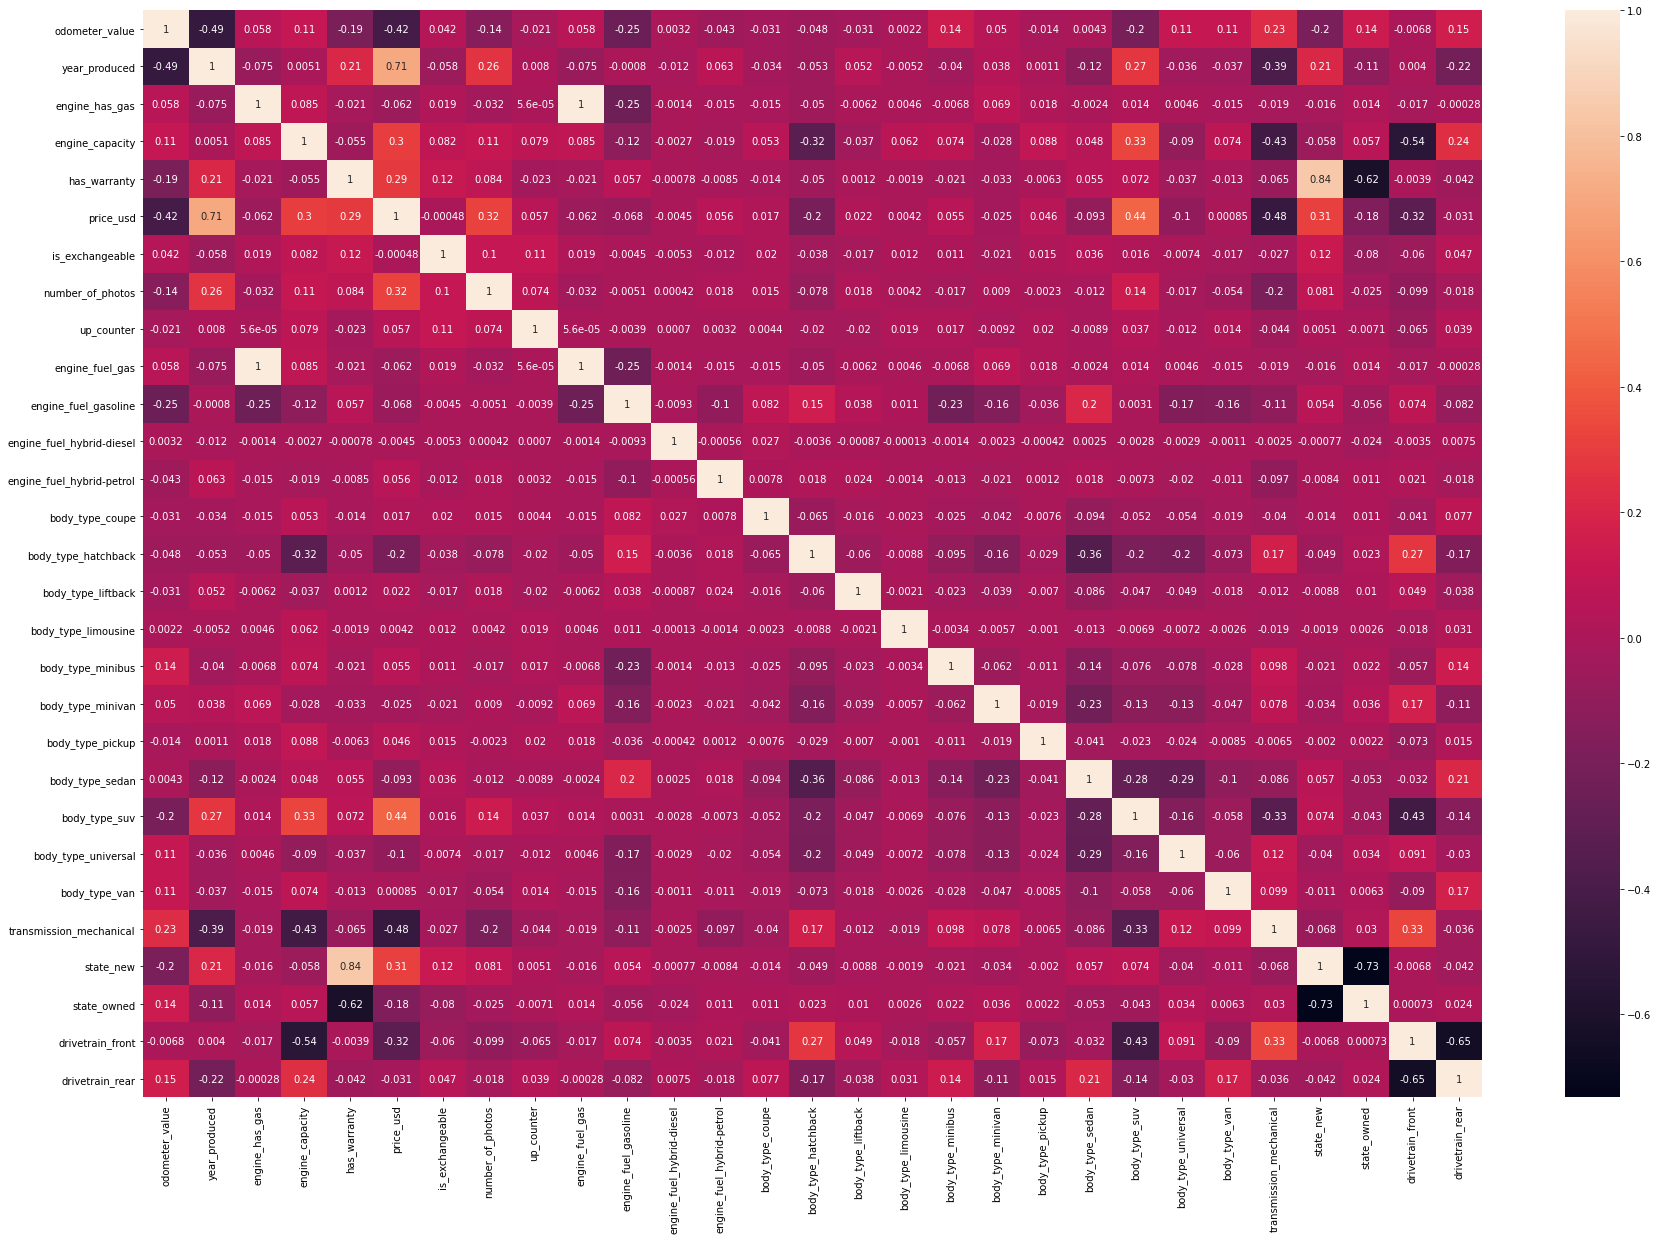

In [13]:
# let's get a corelation of our data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (30, 20))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
#For Manufacturer and model names
data.manufacturer_name = data.	manufacturer_name.str.lower()
data.model_name = data.model_name.str.lower()

dummy = pd.get_dummies(data[["manufacturer_name","model_name"]], drop_first = True)
# here we dropped first columns which is 800 for prevent dummy variable trap 

data = pd.concat([data, dummy], axis = 1)
# now we don't need Car_Name columns so let's drop it
data.drop(columns = ["manufacturer_name", "model_name"], inplace = True)